Goal: To determine if a person makes more than 50K a year using data obtined from UCI at 

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
    

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set()


C:\Users\USER\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Exploratory Data Analysis

In [2]:
filepath = "adult.data"
data= pd.read_csv(filepath)

In [3]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [5]:
data.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [6]:
data.shape

(32560, 15)

Convert to a dataFrame

In [7]:
data_pd = pd.DataFrame(data)
data_pd

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Renaming the columns

In [8]:
data_pd.rename(columns={
    '39':"age", 
    ' State-gov':'workclass', 
    ' 77516':"fnlwgt",
    ' Bachelors':"education",
    ' 13':'education-num',
    ' Never-married':"marital-status",
    ' Adm-clerical':"occupation", 
    ' Not-in-family':"relationship", 
    ' White':"race",
    ' Male':"sex", 
    ' 2174':"capital-gain", 
    ' 0':"capital-loss",
    ' 40':"hours-per-week", 
    ' United-States':"country",
    ' <=50K':"salary"
}, inplace =True)

In [9]:
data_pd.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
data_pd.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  country         32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are no missing values

In [12]:
data_pd.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

Some visualizations

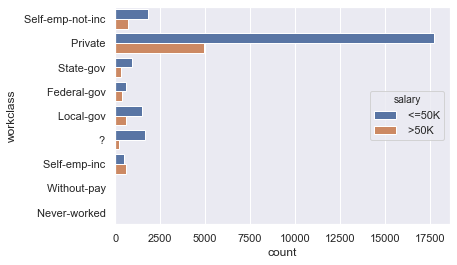

In [13]:
sns.countplot(y=data_pd['workclass'], hue=data_pd['salary'],)

Adults working in the private sector tends to earn more salaries. Generally more workers eaen less than 50k

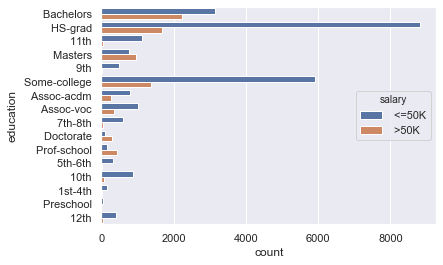

In [14]:
sns.countplot(y=data_pd['education'], hue=data_pd['salary'],)

Most adults with Masters degree earn more than 50k. Also, most adults with some form of degrees earn more than others
especially those with college, highschool and baachelors degree earn.
Thus, the higher the education, the higher the chance of earning more than 50K

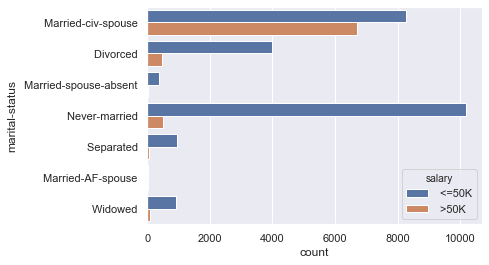

In [15]:
sns.countplot(y=data_pd['marital-status'], hue=data_pd['salary'],)

Married couples staying together have higher salaries

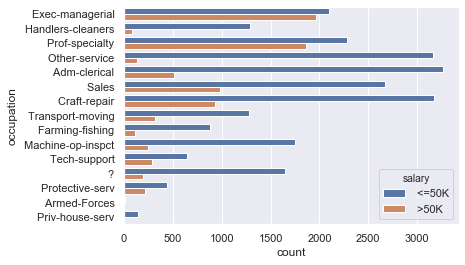

In [16]:
sns.countplot(y=data_pd['occupation'], hue=data_pd['salary'],)

Adults that executives, have high professsional specialties, work in sales and deals in craft-repair have higher salaries. 

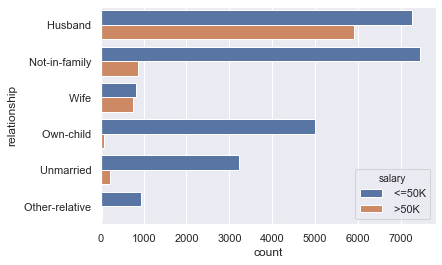

In [17]:
sns.countplot(y=data_pd['relationship'], hue=data_pd['salary'],)

Husbands make higher income according to thhis data. Also, compared to the unmarried, more income is made by the husband or wife.
Thus, it can be said that couples make higher income

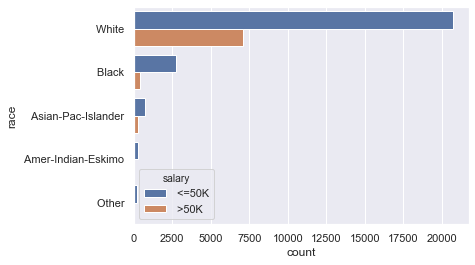

In [18]:
sns.countplot(y=data_pd['race'], hue=data_pd['salary'],)

Whites make more income according to the data

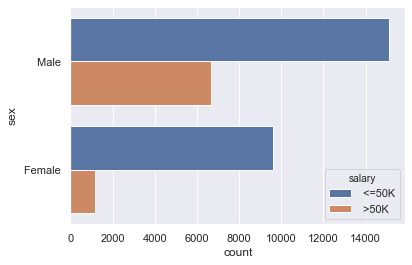

In [19]:
sns.countplot(y=data_pd['sex'], hue=data_pd['salary'],)

Generally, adult males have higher salaries than adult females

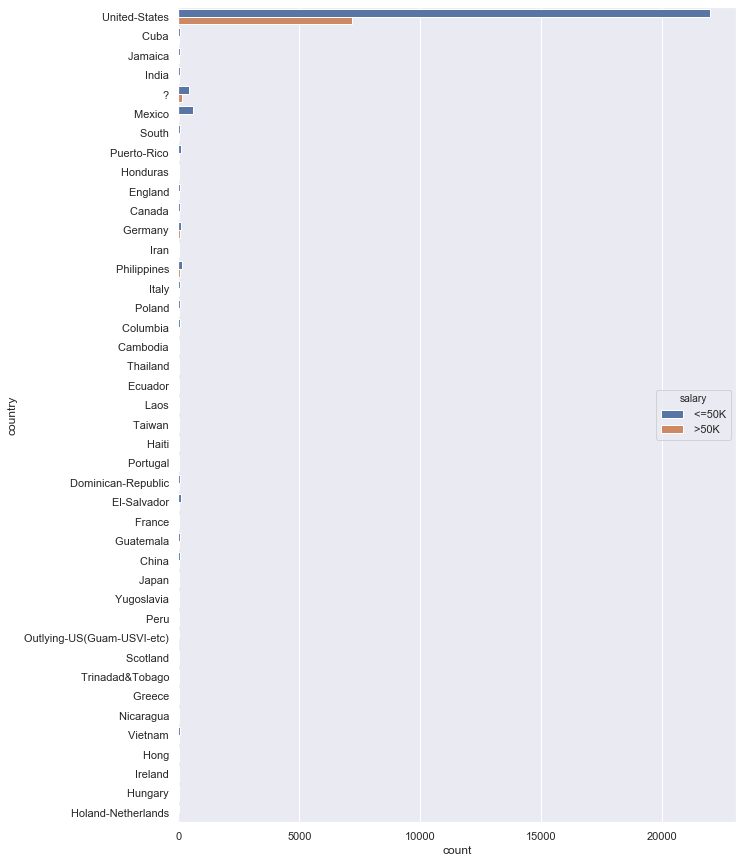

In [20]:
fig, ax = plt.subplots(figsize = (10,15))
sns.countplot(y=data_pd['country'], hue=data_pd['salary'], ax=ax)

Highest earning adults are in the USA

#### Feature Engineering

In [21]:

data_pd.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [22]:
data_pd['salary'].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_pd['salary'] = le.fit_transform(data.salary)
data_pd['salary'].sample(5)

21229    0
15143    0
10096    0
17183    0
27973    0
Name: salary, dtype: int32

In [24]:
data_pd['salary'].value_counts()

0    24719
1     7841
Name: salary, dtype: int64

Separate the y (target variable) and the X (independent variables)

In [25]:
y = data_pd['salary']
X = data_pd.drop('salary', axis=1)

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int32

In [27]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  country         32560 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Converting Categorical to Numerical Variables Using one_hot_encoding

In [29]:
# get columns that are of dtypes=object
one_hot_encode_cols = X.dtypes[X.dtypes == np.object] 

one_hot_encode_cols = one_hot_encode_cols.index.tolist() #list of categorical fields

X[one_hot_encode_cols].head()

,workclass,education,marital-status,occupation,relationship,race,sex,country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


converting the categories variable to dummies

In [30]:
X = pd.get_dummies(X, columns=one_hot_encode_cols, drop_first=True)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 100 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age                                    32560 non-null  int64
 1   fnlwgt                                 32560 non-null  int64
 2   education-num                          32560 non-null  int64
 3   capital-gain                           32560 non-null  int64
 4   capital-loss                           32560 non-null  int64
 5   hours-per-week                         32560 non-null  int64
 6   workclass_ Federal-gov                 32560 non-null  uint8
 7   workclass_ Local-gov                   32560 non-null  uint8
 8   workclass_ Never-worked                32560 non-null  uint8
 9   workclass_ Private                     32560 non-null  uint8
 10  workclass_ Self-emp-inc                32560 non-null  uint8
 11  workclass_ Self-emp-not-inc

In [32]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,...,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.029484,0.064281,0.000215,0.697052,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895854,0.002058,0.000491
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.169161,0.245257,0.014661,0.459540,...,0.033691,0.059068,0.019194,0.049508,0.039547,0.023506,0.024150,0.305455,0.045316,0.022162
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#combining the X and y that have been featured engineered

pd_data_modified = pd.concat([X,y], axis =1)

pd_data_modified.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,salary
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Using stratified shuffle split to split data of training into train and test sets

In [34]:


feature_cols = [x for x in pd_data_modified.columns if x != "salary"]

feature_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupati

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [36]:
train_idx, test_idx = next(strat_shuff_split.split(pd_data_modified[feature_cols], pd_data_modified['salary']))

In [37]:
X_train = pd_data_modified.loc[train_idx, feature_cols]
y_train = pd_data_modified.loc[train_idx, 'salary']

X_test = pd_data_modified.loc[test_idx, feature_cols]
y_test =pd_data_modified.loc[test_idx, 'salary']

Check for stratified split for the training and test sets

In [38]:
y_train.value_counts(normalize=True)

0    0.75917
1    0.24083
Name: salary, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

0    0.759214
1    0.240786
Name: salary, dtype: float64

Scaling the X_values

In [40]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

X_train_s = s.fit_transform(X_train)

X_test_s = s.transform(X_test)

#### Modelling

In [41]:
# first model will be logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_s, y_train)
y_pred = lr.predict(X_test_s)

In [42]:
# getting values for performance measurement


#to get the "AUC", y_prob is needed
y_prob = lr.predict_proba(X_test_s)


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)



score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7416
           1       0.75      0.61      0.67      2352

    accuracy                           0.86      9768
   macro avg       0.82      0.77      0.79      9768
weighted avg       0.85      0.86      0.85      9768

   accuracy  precision    recall        f1       auc
0  0.857801   0.752756  0.609694  0.673714  0.910556


The model has an accuracy of 0.857801

In [43]:
# second model will be logistic regression with L1 (lasso) regularization

from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)


lr_l1 = LogisticRegression().fit(X_train_s, y_train)
y_pred = lr_l1.predict(X_test_s)

In [44]:
# getting values for performance measurement


#to get the "AUC", y_prob is needed
y_prob = lr_l1.predict_proba(X_test_s)


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)



score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7416
           1       0.75      0.61      0.67      2352

    accuracy                           0.86      9768
   macro avg       0.82      0.77      0.79      9768
weighted avg       0.85      0.86      0.85      9768

   accuracy  precision    recall        f1       auc
0  0.857801   0.752756  0.609694  0.673714  0.910556


Accuracy score of Logistic regression with L1 regularizaion is higher with a value of 0.862305

In [45]:
# third model will be the random forest 

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=400, random_state=42, 
                            warm_start=True,
                            n_jobs=-1)         

RF = RandomForestClassifier().fit(X_train_s, y_train)
y_pred = RF.predict(X_test_s)

In [46]:
# getting values for performance measurement


#to get the "AUC", y_prob is needed
y_prob = RF.predict_proba(X_test_s)


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)



score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_prob[:,1])},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7416
           1       0.75      0.63      0.69      2352

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768

   accuracy  precision    recall        f1      auc
0   0.86036   0.747247  0.634779  0.686437  0.90865


The random forest classifier has a higher accuracy of 0.862305

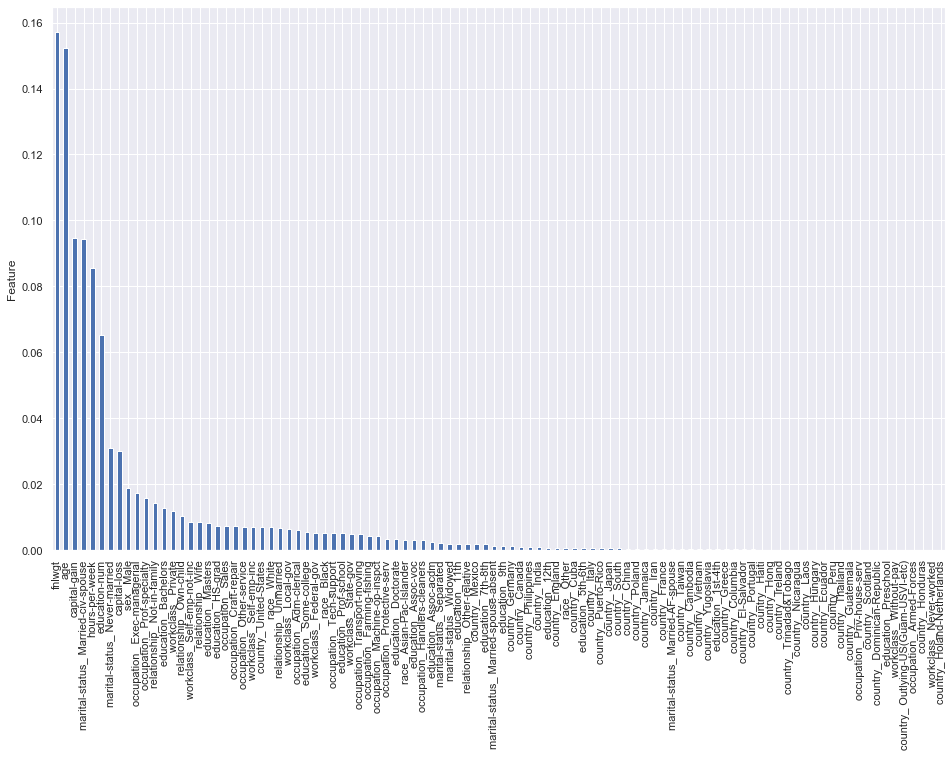

In [47]:
# To get the importance of each X_variables

feature_imp = pd.Series(RF.feature_importances_, index=feature_cols,).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 10))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

The most important features are fnlwgt, age, capital gain, hours-per-week, marital-status, education_num